In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajbirahmed","key":"8c5a40b84190c48e398d4e8c4977d6f0"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()s

#Generator

In [ ]:
def my_gen():
  yield("First")
  yield("Second")
  yield("Third")

In [ ]:
gen = my_gen()
for g in gen:
  print(g)

First
Second
Third


In [ ]:
def my_gen(num):
  for i in range(1,num+1):
    yield i**2

In [ ]:
gen = my_gen(5)
print(next(gen))
print(next(gen))
print(next(gen))

1
4
9


In [ ]:
import sys
L = [i*i for i in range(1000000)]
sys.getsizeof(L)

8448728

In [ ]:
L = (i*i for i in range(1000000)) # shortcut to create generator
sys.getsizeof(L)

208

In [ ]:
next(L)

0

In [ ]:
next(L)

1

In [ ]:
next(L)

4

#CNN model 1

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [9]:
train_datagen = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/train',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

test_datagen = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
def image_processor(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_datagen = train_datagen.map(image_processor)
test_datagen = test_datagen.map(image_processor)

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(train_datagen,epochs=5,validation_data=test_datagen)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 68ms/step - accuracy: 0.5574 - loss: 0.7077 - val_accuracy: 0.6886 - val_loss: 0.5871
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 66ms/step - accuracy: 0.7037 - loss: 0.5688 - val_accuracy: 0.7738 - val_loss: 0.4843
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.8048 - loss: 0.4264 - val_accuracy: 0.7744 - val_loss: 0.5431
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8844 - loss: 0.2774 - val_accuracy: 0.7690 - val_loss: 0.7781
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 73ms/step - accuracy: 0.9444 - loss: 0.1391 - val_accuracy: 0.7776 - val_loss: 0.8982


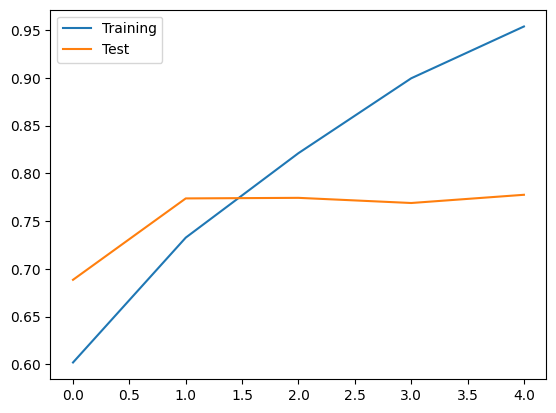

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="Training")
plt.plot(history.history['val_accuracy'], label="Test")
plt.legend()
plt.show()

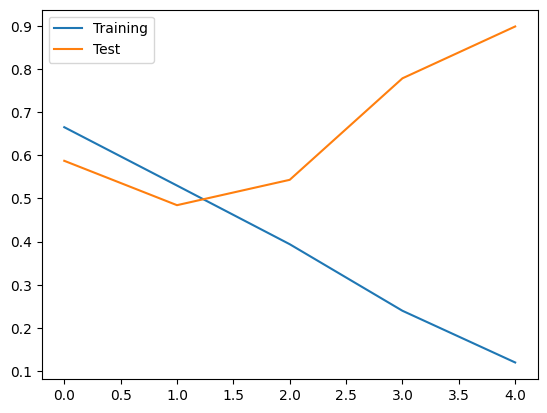

In [17]:
plt.plot(history.history['loss'],label="Training")
plt.plot(history.history['val_loss'], label="Test")
plt.legend()
plt.show()

#CNN model 2
using BatchNormalization and Dropout

In [18]:
from keras.layers import BatchNormalization,Dropout

In [19]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))

model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))

model2.add(Flatten())
model2.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dropout(0.2))
model2.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dropout(0.1))
model2.add(Dense(1,activation='sigmoid'))

In [20]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [21]:
history2 = model2.fit(train_datagen,epochs=5,validation_data=test_datagen)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.5581 - loss: 11.2017 - val_accuracy: 0.6328 - val_loss: 2.5306
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.6518 - loss: 2.0455 - val_accuracy: 0.6432 - val_loss: 1.6285
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7122 - loss: 1.4903 - val_accuracy: 0.7478 - val_loss: 1.0467
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 76ms/step - accuracy: 0.7369 - loss: 1.0915 - val_accuracy: 0.7610 - val_loss: 0.9948
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7637 - loss: 1.0257 - val_accuracy: 0.7770 - val_loss: 1.1884


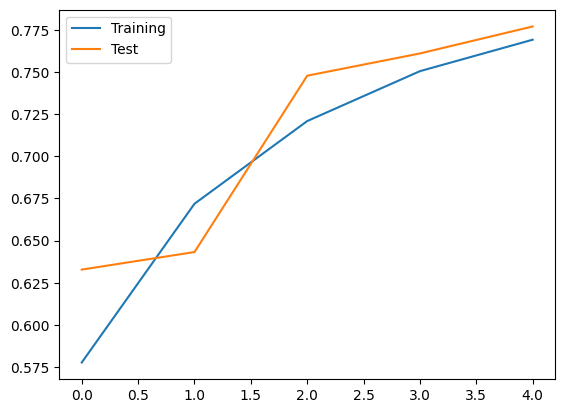

In [22]:
plt.plot(history2.history['accuracy'],label="Training")
plt.plot(history2.history['val_accuracy'], label="Test")
plt.legend()
plt.show()

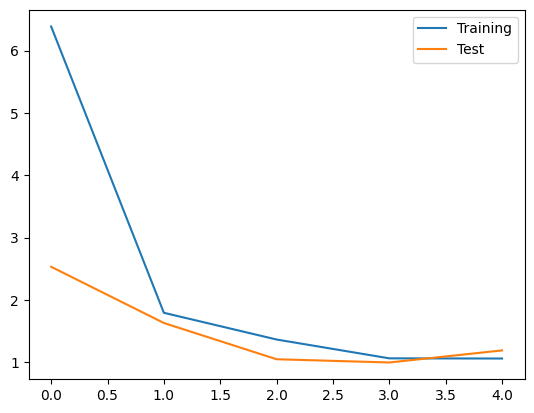

In [23]:
plt.plot(history2.history['loss'],label="Training")
plt.plot(history2.history['val_loss'], label="Test")
plt.legend()
plt.show()

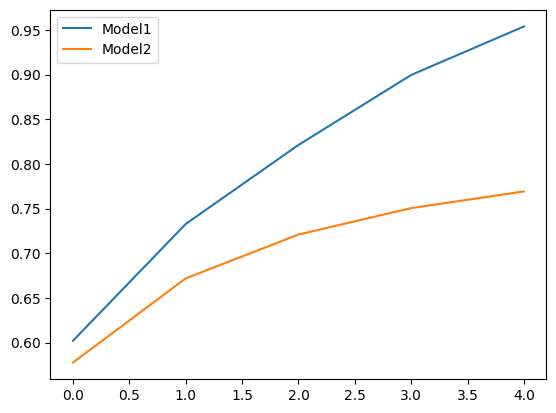

In [24]:
plt.plot(history.history['accuracy'],label="Model1")
plt.plot(history2.history['accuracy'], label="Model2")
plt.legend()
plt.show()